<a href="https://colab.research.google.com/github/KirvelPasha/data-science/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
import matplotlib.pyplot as plt

In [93]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

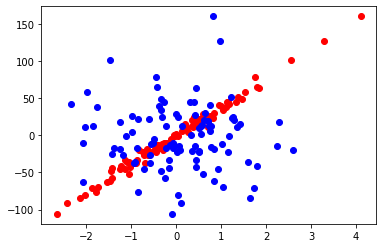

In [95]:
plt.scatter(data[:,0], target, color = 'r')
plt.scatter(data[:,1], target, color = 'b');

In [96]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                    test_size = 0.3)

**LinearRegression**

In [97]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [98]:
print(test_labels)

[ 11.96165156 -84.32102748 -13.26392817   1.72644759  13.31981235
 -10.29545833 -91.477377    -4.38652971  29.8208999   24.47584129
  24.82763821  49.41686419  64.70214251 -22.64686884  10.33267887
 -36.44717565  27.83791274 -45.38589148 -36.69728864   4.45578287
 -21.48288019 -32.92158843  78.24817537 -32.71074998  38.36241814
  12.47089016 -35.32062686   5.86887774 -22.32195021 -22.33224966]


In [99]:
print(predictions)

[ 13.46291074 -82.74262092 -16.78392746  -0.63502117  14.07728571
 -11.44272227 -94.48731954  -5.20907187  31.32808713  22.83340283
  30.26285174  55.75676615  68.2570284  -18.13597938   8.65727684
 -41.61801071  22.84734568 -44.52728459 -27.77914719   9.00248332
 -25.08762712 -34.57038544  66.29808518 -44.29929198  41.7180984
  19.59048184 -42.79039928   4.20684134 -23.40881581 -29.52742001]


In [112]:
metrics.mean_squared_error(test_labels, predictions)

25.45648452347817

In [100]:
metrics.mean_absolute_error(test_labels, predictions)

4.01768060379051

In [113]:
metrics.r2_score(test_labels, predictions)

0.9823198701412574

In [101]:
coef

array([38.07925837,  0.        ])

In [102]:
linear_regressor.coef_

array([38.51835245,  0.15987562])

In [110]:
linear_regressor.intercept_

-0.7221061155660369

**Cross Val Score**

In [103]:
linear_regressor_score = linear_model.LinearRegression()

In [104]:
linear_scoring = model_selection.cross_val_score(linear_regressor_score, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)

In [105]:
print('mean:', linear_scoring.mean())

mean: -4.070071498779696


In [106]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [107]:
linear_scoring = model_selection.cross_val_score(linear_regressor_score, data, target, scoring = scorer, 
                                                  cv = 10)

In [108]:
print('mean:', linear_scoring.mean())

mean: 4.070071498779696
